# **Exploratory Data Analysis**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read dataset
df_raw = pd.read_csv('/content/HR_Data.csv')

# make a copy of the original source file
df = df_raw.copy()

print("Size of dataset is: {}".format(df.shape))

Size of dataset is: (1470, 35)


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# dataset columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
# columns datatypes
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [8]:
# groupby column data types
df.columns.groupby(df.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [9]:
# number of columns
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[0], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[1], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[1]])))

No of columns for int64 is 26.
No of columns for object is 9.


In [10]:
# check for missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [11]:
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [12]:
# summary statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


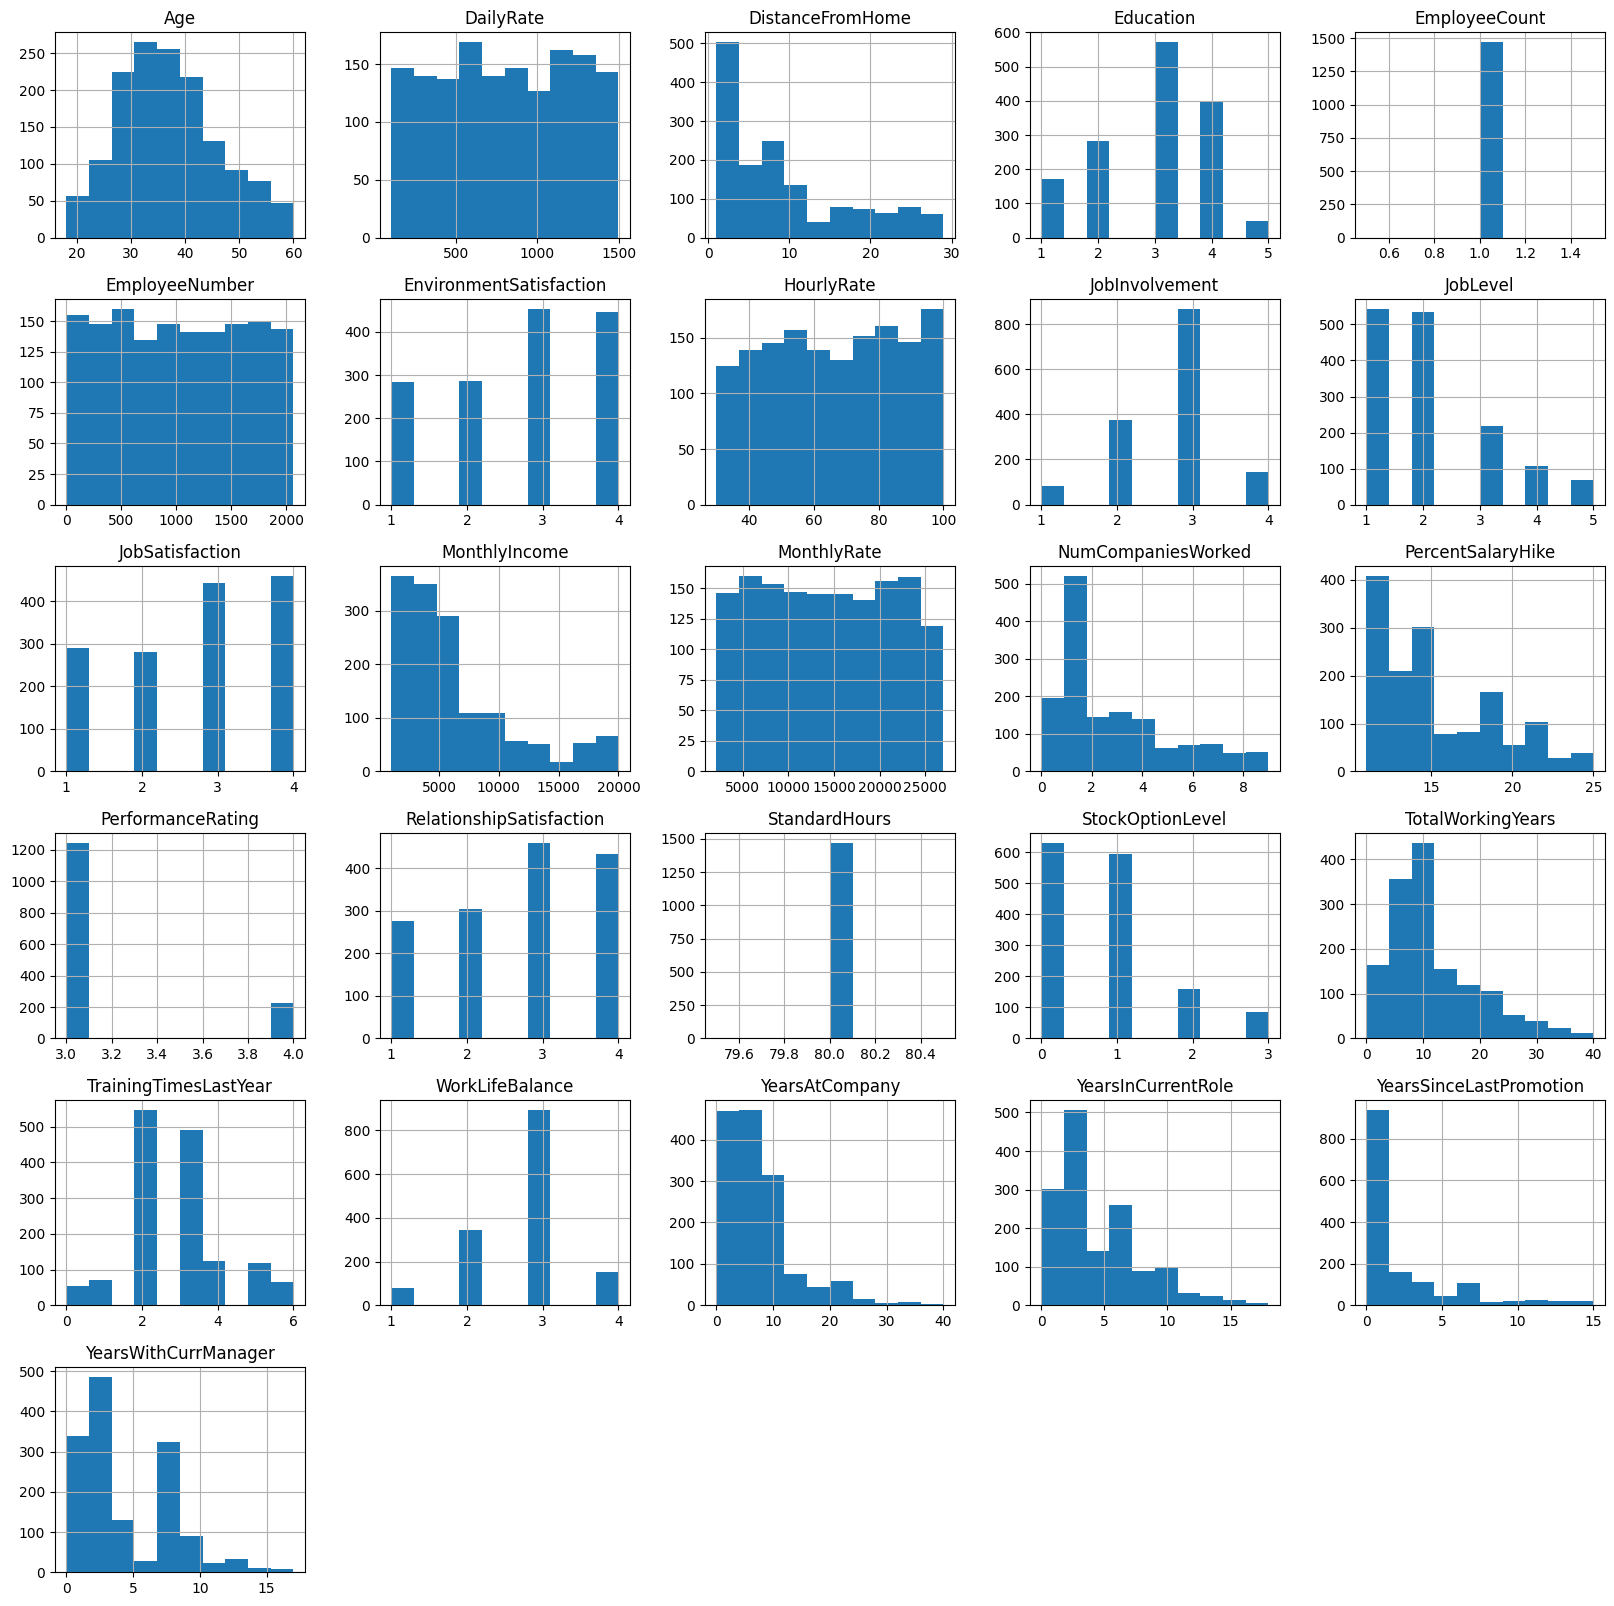

In [13]:
# plot histogram for numeric columns
df.hist(figsize=(20,20))
# plt.savefig("histograms.png", bbox_inches="tight")
plt.show()

# **Feature Variables**

## **Age**

Age of employees is from 18 to 60 years old. The average age of ex-employees at 33.6 years old and 37.6 years old for current employees.

In [14]:
# Age
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))

Age of employees is from 18 to 60 years old.


In [15]:
# Ex-Employees
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Ex-Employees:
Average Age of Ex-Employees = 33.6
Standard Deviation = 9.7


In [16]:
# Active Employees
print("Active Employees:")
print("Average Age of Active Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))

Active Employees:
Average Age of Active Employees = 37.6
Standard Deviation = 8.9


<ipython-input-17-bd2545376bad>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
<ipython-input-17-bd2545376bad>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")


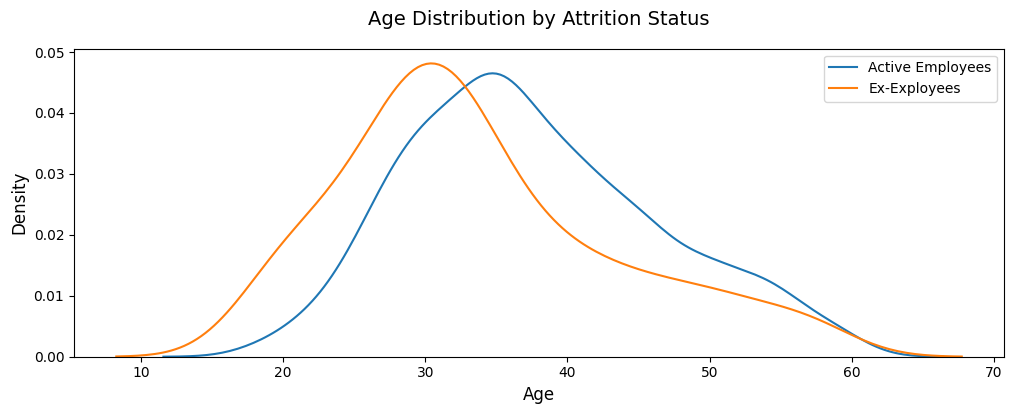

In [17]:
# kernel density estimation (KDE) plot

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()

## **Gender**

Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17% for Males and 15% for Females.

In [18]:
# Gender of employees
df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


<ipython-input-19-14456a539cfa>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


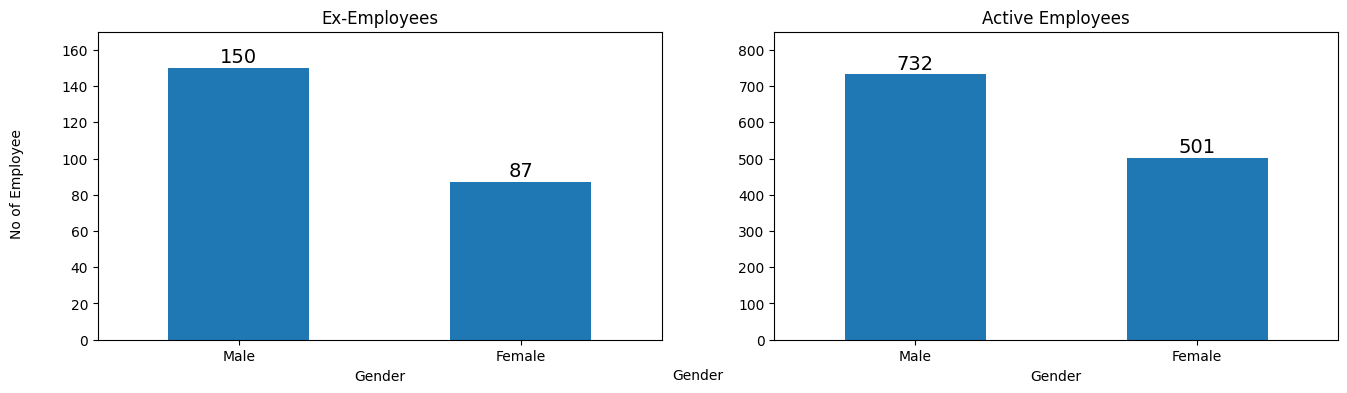

In [19]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14)

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14)

fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()

## **Marital Status**

The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). Single employees show the largest proportion of leavers at 25%.

In [20]:
# marital Status of employees
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,673
Single,470
Divorced,327


<ipython-input-21-f7c5b4595b90>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


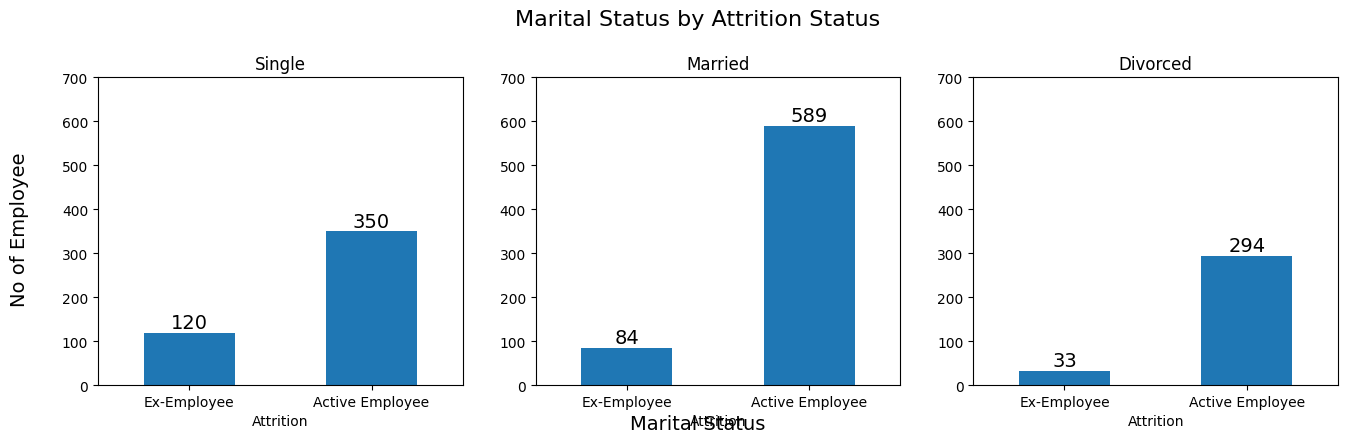

In [21]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14)

plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14)

plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14)

# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_3.png", bbox_inches="tight")
plt.show()

## **Job Role**

Sale Representative has the highest proportion of leavers, followed by Laboratory Technician and Human Resources.

In [22]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


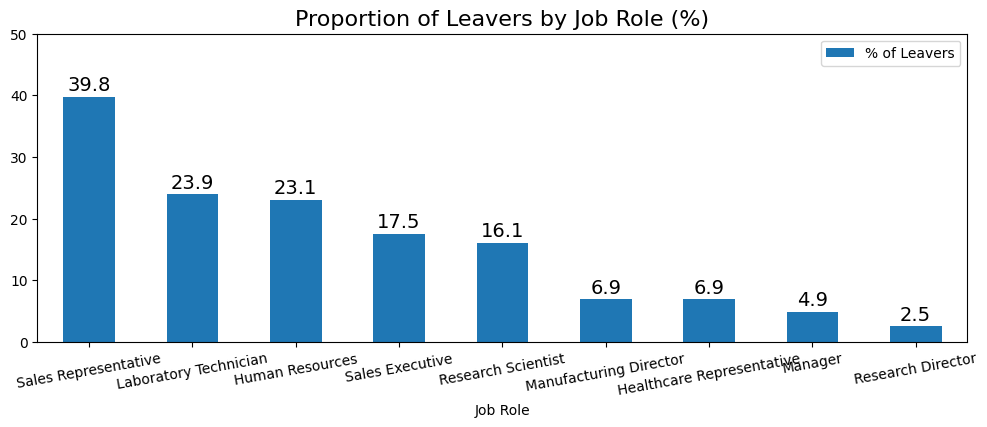

In [23]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_JR = df_JobRole.groupby(by="Job Role").sum()
g = df_JR.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Role (%)",  fontsize=16)
plt.xticks(rotation=10)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14)

# plt.savefig("role_hist_3.png", bbox_inches="tight")
plt.show()

## **Job Level**

Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [24]:
# breakdown by job level
df['JobLevel'].value_counts()

,count
JobLevel,
1,543
2,534
3,218
4,106
5,69


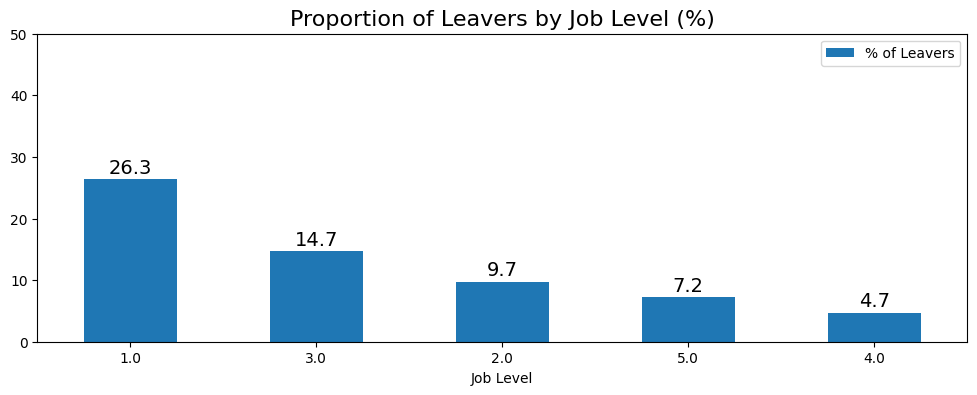

In [25]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_JL = df_JobLevel.groupby(by="Job Level").sum()
g = df_JL.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Level (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14)

# plt.savefig("level_hist_3.png", bbox_inches="tight")
plt.show()

## **Overtime**

Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [26]:
# breakdown by overtime
df['OverTime'].value_counts()

,count
OverTime,
No,1054
Yes,416


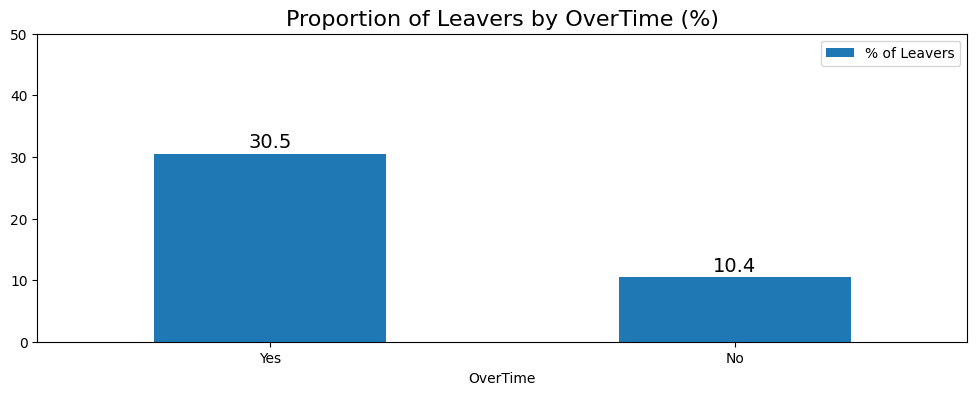

In [27]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14)

# plt.savefig("ot_hist_3.png", bbox_inches="tight")
plt.show()

## **Work-Life Balance Score**

A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [28]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts()

,count
WorkLifeBalance,
3,893
2,344
4,153
1,80


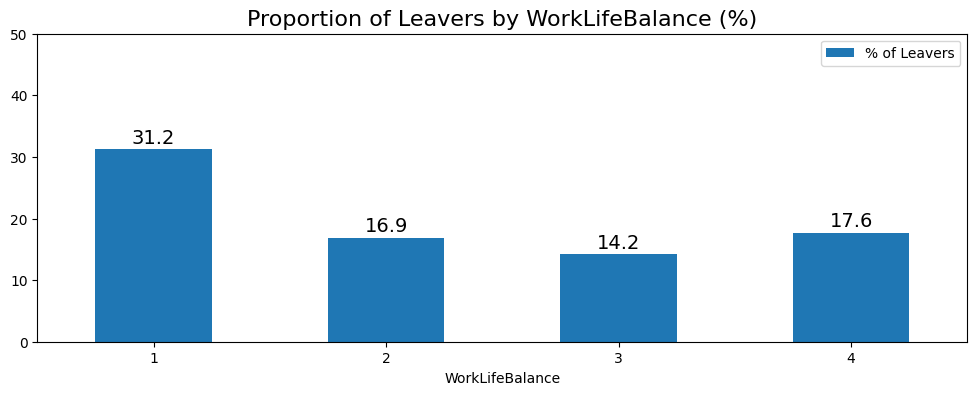

In [29]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
g = df_WLB.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by WorkLifeBalance (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14)

# plt.savefig("wlb_hist_2.png", bbox_inches="tight")
plt.show()

## **Monthly Income**

In [30]:
# Monthly Income
print("Monthly Income for employees is from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Monthly Income for employees is from $1009 to $19999.


<ipython-input-31-21e86ee762ed>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
<ipython-input-31-21e86ee762ed>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1[["MonthlyIncome"]], his

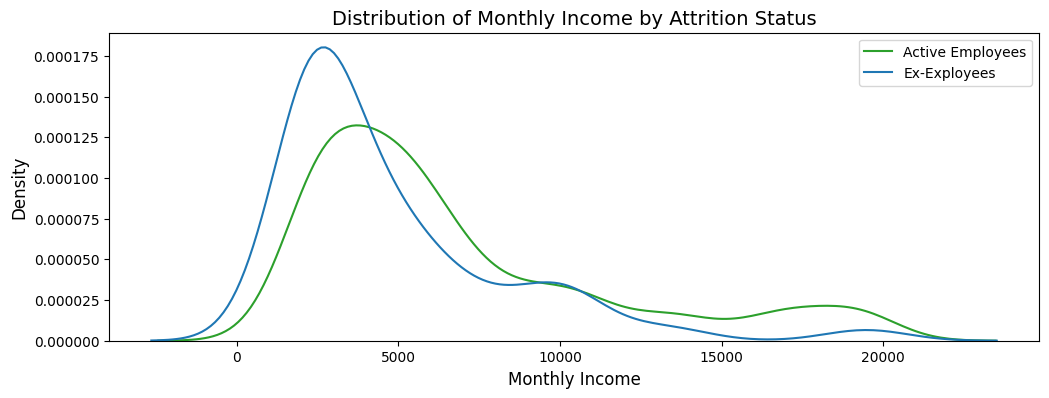

In [31]:
# kernel density estimation (KDE) plot

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_1.png", bbox_inches="tight")
plt.show()

## **Target Variable: Attrition**

In [32]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


<ipython-input-33-a47d59502169>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


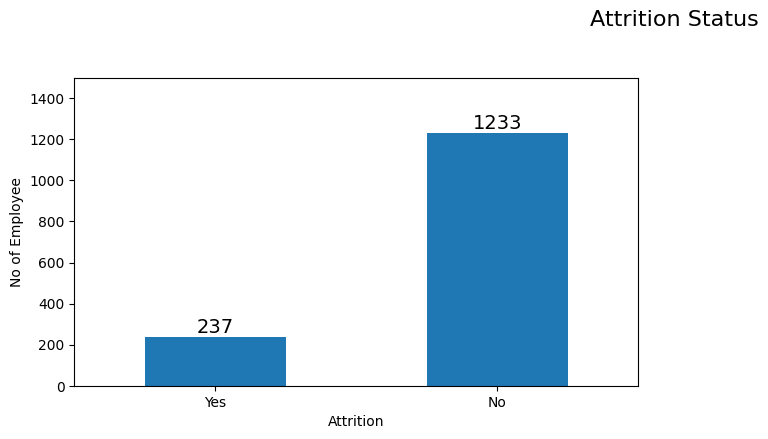

In [33]:
# df['Attrition'].value_counts().plot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df['Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("No of Employee")
plt.ylim(0,1500)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14)

# set title and axis labels
plt.suptitle("Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
# fig.text(0.5, 0.001, 'Attrition Status', ha='center', fontsize=14)
# fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("att_hist_1.png", bbox_inches="tight")
plt.show()

# **Correlation**

In [34]:
# Copy the dataset and convert 'Attrition' to binary target
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

# Drop irrelevant columns
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

# Convert categorical variables to dummy variables
df_corr = pd.get_dummies(df_corr, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

# Find correlations with the target and sort
correlations = df_corr.corr()['Target'].sort_values()

# Display the most positive and most negative correlations
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 BusinessTravel_Travel_Frequently    0.115143
JobRole_Sales Representative        0.157234
MaritalStatus_Single                0.175419
OverTime_Yes                        0.246118
Target                              1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [35]:
# compute the correlation matrix
corr = df_corr.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.083919,-0.119185,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.040035,-0.075835,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,0.030232,-0.027445,0.025514
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.001865,0.004168,-0.020322
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,-0.022180,0.009035,0.070132
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,0.036432,-0.033436,-0.007782
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.028324,-0.045253,-0.003507
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.344608,0.552744,0.114896,0.414319,-0.387788,0.127490,-0.216559,0.050547,-0.087072,0.000544
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.010315,0.024571,0.024539
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.056767,-0.089361,0.006089


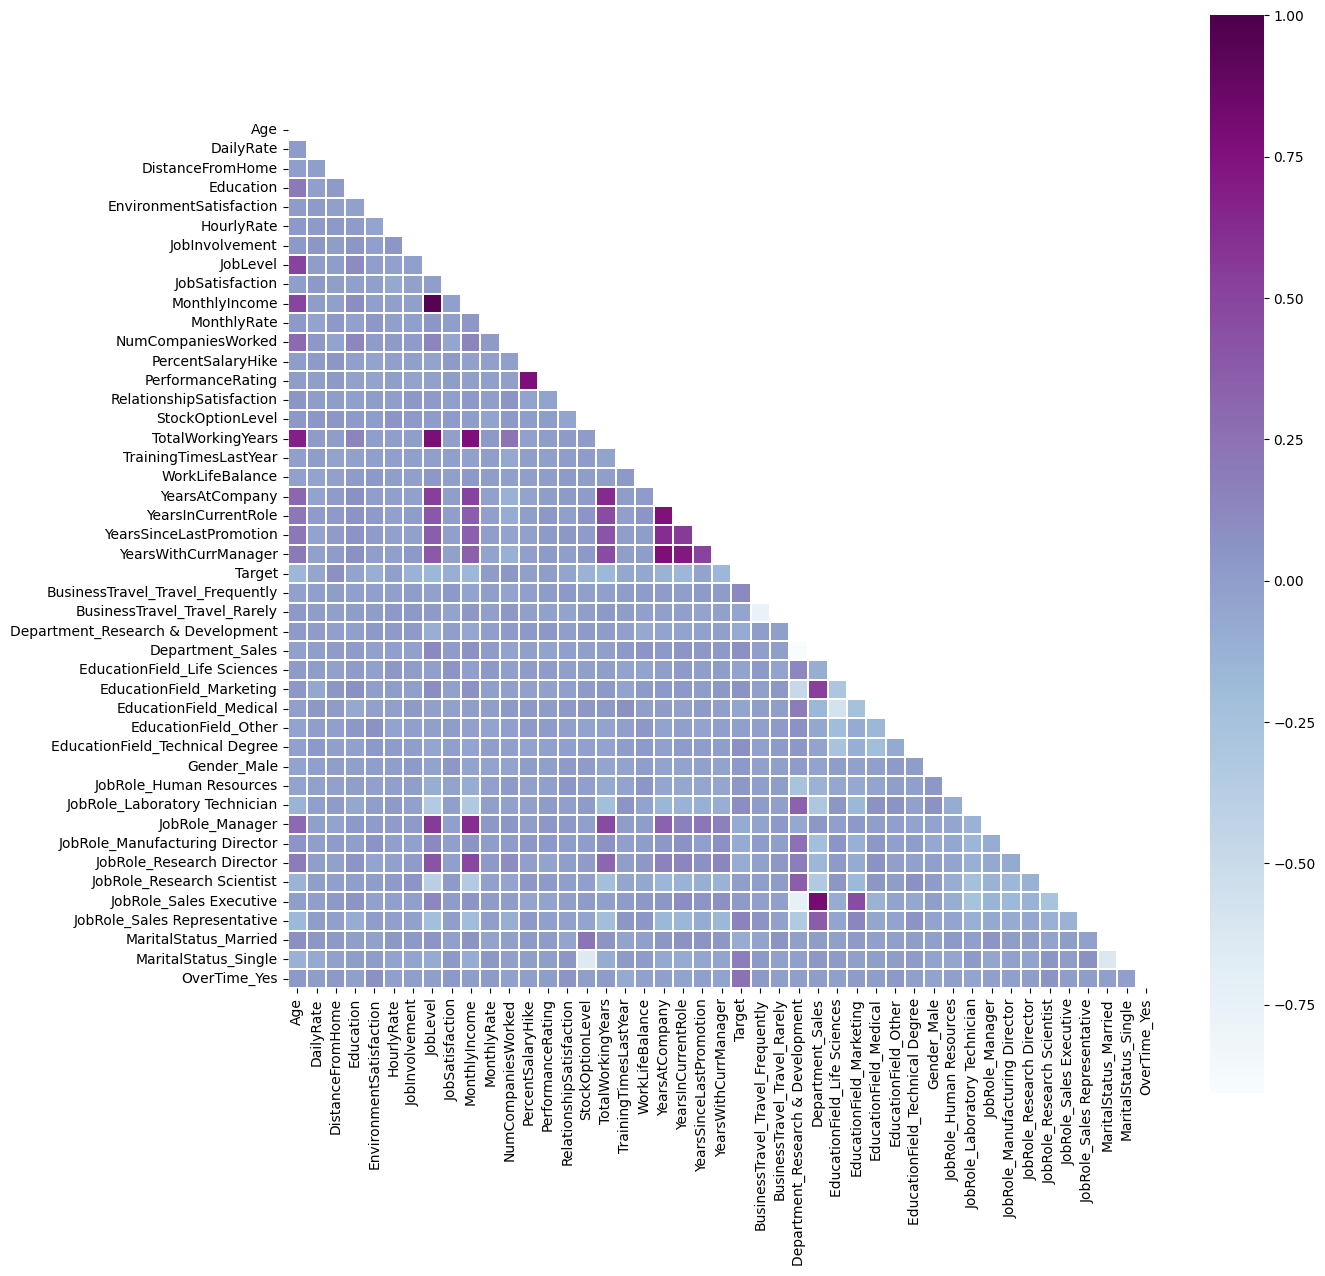

In [36]:
# set figure size
plt.figure(figsize=(14, 14))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", linewidths=.1, annot=False, mask=mask)

# fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight")
plt.show()

# **visulaizations**

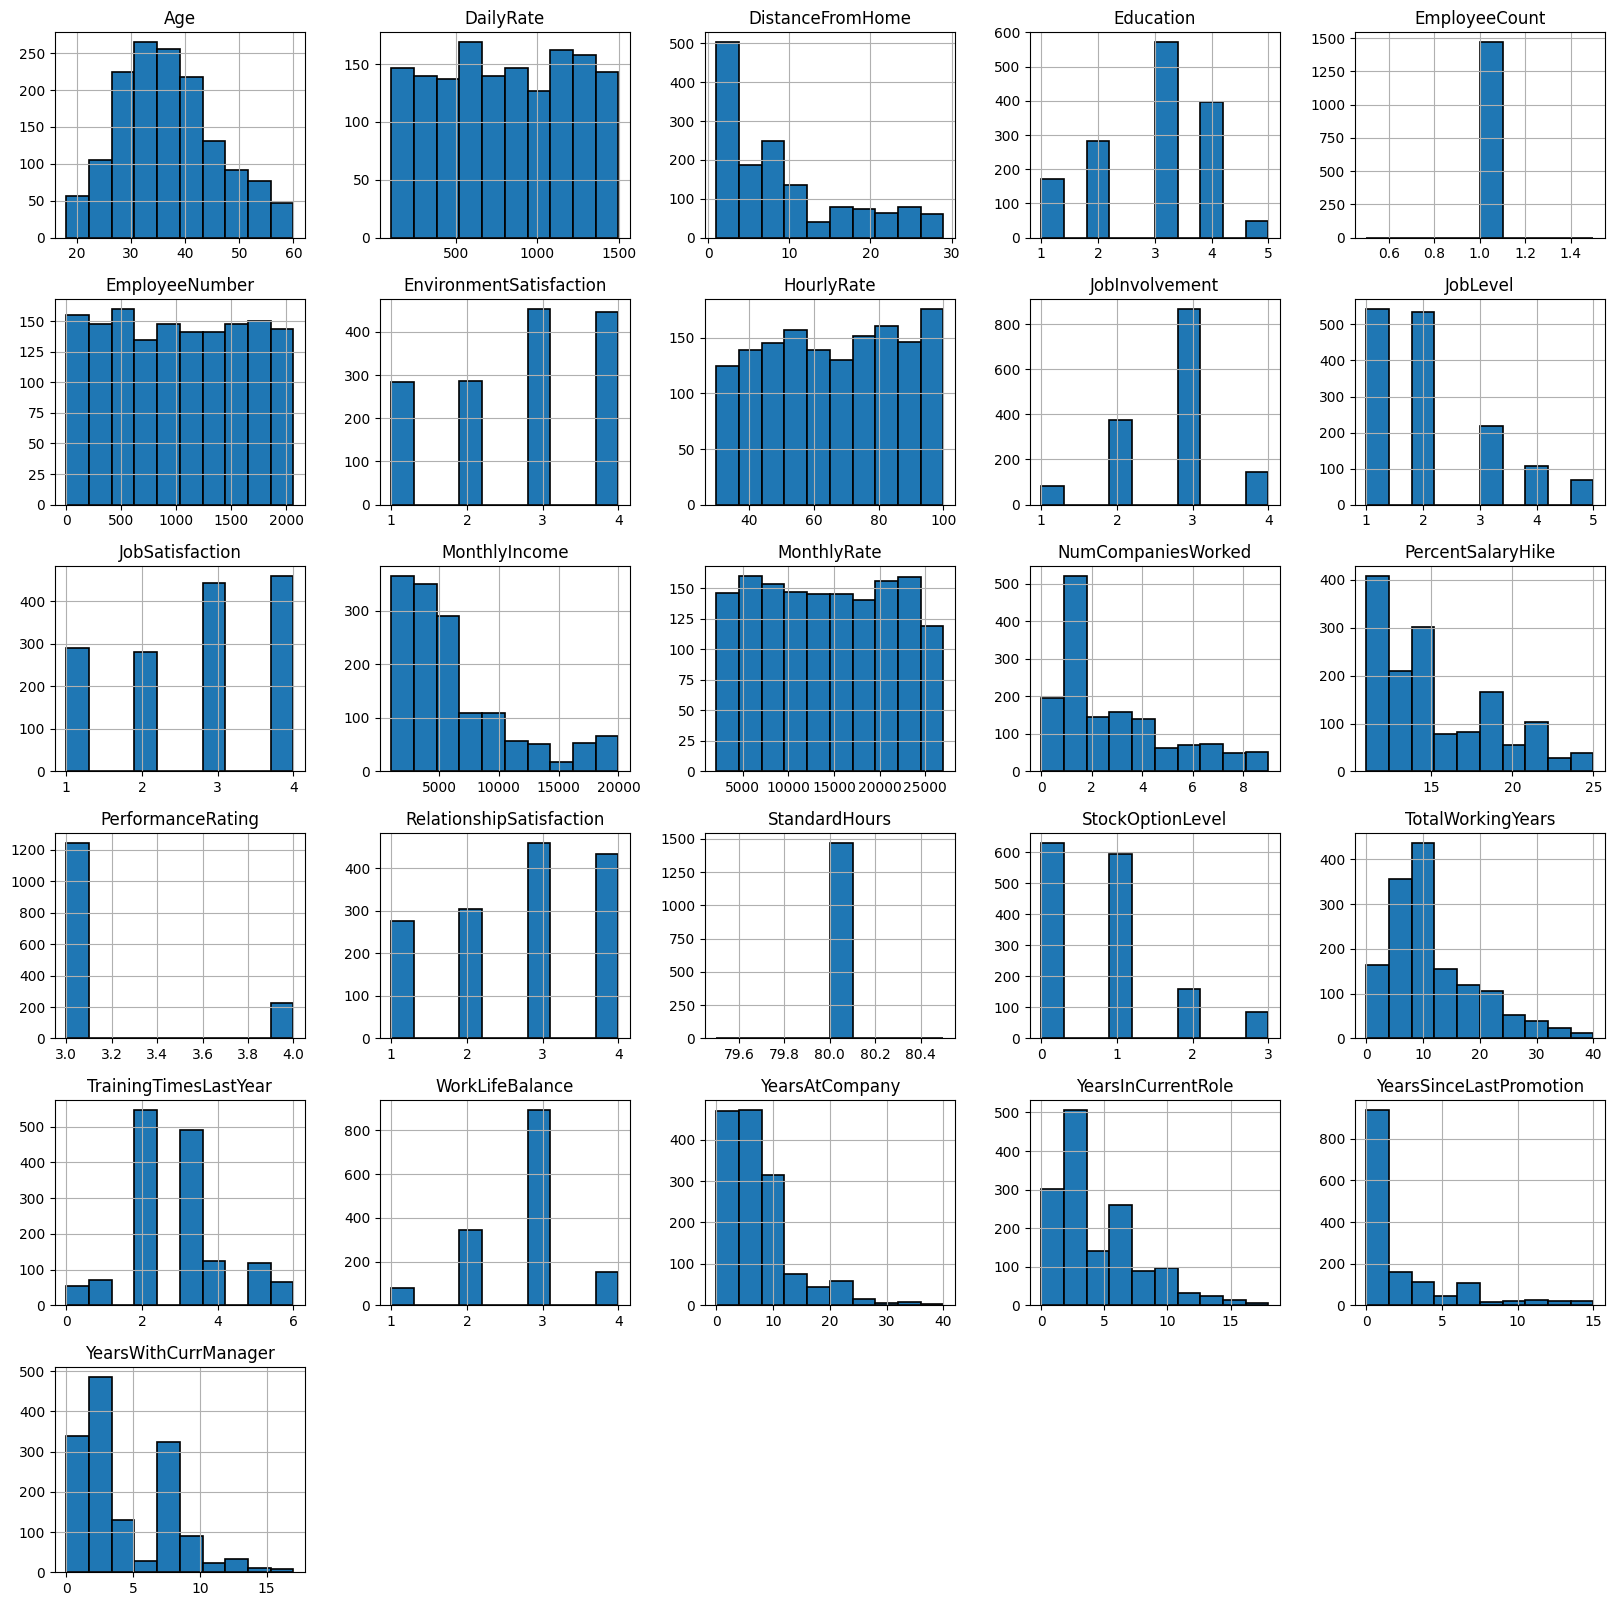

In [37]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [38]:
# How does self Job Satisfaction impact the Attrition?
import plotly.express as px
jsats_att=df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

**Observation** With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above.

In [39]:
# Is income the main factor towards employee attrition?
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

**Observation** As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly.

# **Pre-processing**

In [40]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#  reate a label encoder object
le = LabelEncoder()

In [41]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [42]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df)

In [43]:
print(df.shape)
df.head()

(1470, 54)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,...,True,False,False,False,False,False,False,False,True,False


# **Splitting data into training and testing sets**

In [44]:
# assign the target to a new dataframe and convert it to a numerical type
y = df['Attrition']

In [45]:
print(type(y))
y[:5]

<class 'pandas.core.series.Series'>


,Attrition
0,1
1,0
2,1
3,0
4,0


In [46]:
# remove the target and redundant features from the dataset
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [47]:
print(X.shape)
X.head()

(1470, 49)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,2,4,...,False,False,False,False,False,True,False,False,False,True
1,49,279,8,1,3,1,61,2,2,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1373,2,2,4,1,92,2,1,3,...,True,False,False,False,False,False,False,False,False,True
3,33,1392,3,4,4,0,56,3,1,3,...,False,False,False,False,True,False,False,False,True,False
4,27,591,2,1,1,1,40,3,1,2,...,True,False,False,False,False,False,False,False,True,False


In [48]:
# import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## **Feature Scaling**

In [49]:
# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# define the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [50]:
# fit the scaler on the TRAINING data and use the scaler to transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# use the scaler to transform the TEST data
X_test_scaled = scaler.transform(X_test)

# **Machine Learning Models**

## **Baseline Algorithms**
First, we will use a range of baseline algorithms before we move on to more sophisticated solutions. Total of 9 algorithms considered in this section: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB, XGBoost, Gradient Boosting, AdaBoost. Then, we will pick the top 2-3 algorithms.

We will evaluate the algorithms based on two metrics:



1.   Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
2.   Area under ROC Curve is a performance metric for binary classification problems.

In [51]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [52]:
# selection of algorithms to consider and set performance measure
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", random_state=0)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(("SVM", SVC(gamma="auto", random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=0)))
models.append(("Gaussian NB", GaussianNB()))
models.append(("XGBoost", XGBClassifier(random_state=0)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=0)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=0)))

In [53]:
%%time
# Set shuffle=True and provide random_state for reproducibility
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Evaluate each model in turn and provide accuracy and standard deviation scores
acc_results = []
auc_results = []
names = []

# Set table to populate with performance results
col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
df_results = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using cross-validation
for name, model in models:
    # Accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # ROC AUC scoring
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)

    # Store results in the dataframe
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

# Display the results
print(df_results)

                  Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0       Logistic Regression         81.84         5.21          87.29   
1             Random Forest         80.14         7.25          85.75   
2                       SVM         50.00         0.00          83.84   
3                       KNN         57.38         6.09          81.66   
4  Decision Tree Classifier         61.73         3.95          77.77   
5               Gaussian NB         75.81         6.33          78.67   
6                   XGBoost         80.48         6.10          86.11   
7         Gradient Boosting         79.76         4.75          86.02   
8                  AdaBoost         80.86         5.55          86.57   

   Accuracy STD  
0          3.03  
1          1.93  
2          2.06  
3          2.37  
4          2.45  
5          4.31  
6          1.97  
7          2.63  
8          2.31  
CPU times: user 29.5 s, sys: 634 ms, total: 30.1 s
Wall time: 28.2 s


In [54]:
# sort the results by Accuracy
df_results.sort_values(by=["Accuracy Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.84,5.21,87.29,3.03
8,AdaBoost,80.86,5.55,86.57,2.31
6,XGBoost,80.48,6.10,86.11,1.97
7,Gradient Boosting,79.76,4.75,86.02,2.63
1,Random Forest,80.14,7.25,85.75,1.93
2,SVM,50.00,0.00,83.84,2.06
3,KNN,57.38,6.09,81.66,2.37
5,Gaussian NB,75.81,6.33,78.67,4.31
4,Decision Tree Classifier,61.73,3.95,77.77,2.45


In [55]:
# sort the results by ROC AUC
df_results.sort_values(by=["ROC AUC Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.84,5.21,87.29,3.03
8,AdaBoost,80.86,5.55,86.57,2.31
6,XGBoost,80.48,6.10,86.11,1.97
1,Random Forest,80.14,7.25,85.75,1.93
7,Gradient Boosting,79.76,4.75,86.02,2.63
5,Gaussian NB,75.81,6.33,78.67,4.31
4,Decision Tree Classifier,61.73,3.95,77.77,2.45
3,KNN,57.38,6.09,81.66,2.37
2,SVM,50.00,0.00,83.84,2.06


Based on our Accuracy and ROC AUC comparison analysis, Logistic Regression and XGBoost have the highest mean Accuracy score while Logistic Regression also has the highest mean AUC scores. We will shortlist these two algorithms together with Random Forest for further analysis.

## **Logistic Regression**

In [56]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
modelCV = LogisticRegression(solver='liblinear', random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.81296024 0.87302632 0.79944444 0.82729469 0.85144928 0.8115117
 0.77055556 0.9178719  0.71808511 0.80139152] 

Average AUC score = 0.8184; standard deviation = 0.0521


### **Fine-tuning**

In [57]:
%%time
param_grid = {"C": np.arange(1e-01, 1.01, 0.1), "class_weight": ["balanced", None]} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(LogisticRegression(solver="liblinear",
                                         random_state=0),
                                         return_train_score=True,
                                         param_grid=param_grid,
                                         scoring="roc_auc",
                                         cv=10)

log_gs.fit(X_train, y_train)

print("="*20)
print("best estimator: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print("best score:", log_gs.best_score_)
print("="*20)

best estimator: LogisticRegression(random_state=0, solver='liblinear')
best params: {'C': 1.0, 'class_weight': None}
best score: 0.8148444542223933
CPU times: user 11.9 s, sys: 8.49 s, total: 20.4 s
Wall time: 12.2 s


In [58]:
# make predictions
y_pred = log_gs.predict(X_test)

In [59]:
# calculate accuracy score
logit_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression Classifier on Test set: {:.2f}%'.format(logit_accuracy*100))

Accuracy of Logistic Regression Classifier on Test set: 86.68%


In [60]:
# Classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.78      0.24      0.36        59

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0.84       368



In [61]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = log_gs.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(logit_roc_auc))

AUC on Test set: 0.7978169052712413


[[305   4]
 [ 45  14]]


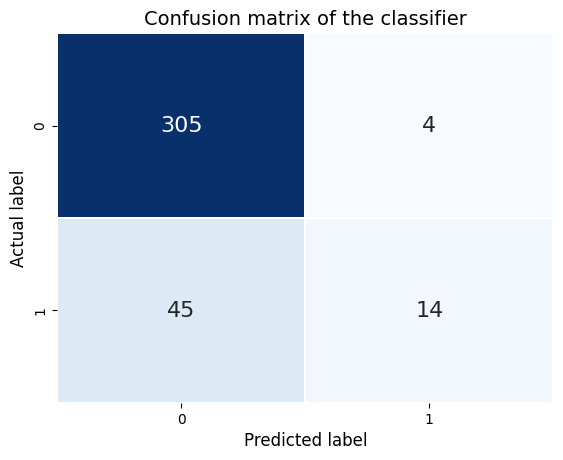

In [62]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()

## **XGBoost Classifier**

In [63]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
modelCV = XGBClassifier(random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.79381443 0.83881579 0.76833333 0.86896135 0.81944444 0.78431373
 0.84222222 0.88016529 0.65425532 0.79759646] 

Average AUC score = 0.8048; standard deviation = 0.0610


### **Fine-tuning**

In [64]:
%%time
xgb_classifier = XGBClassifier(random_state=0)

param_grid = {"n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4],
              "learning_rate":[0.01, 0.1],
              "gamma": [1,2,3]}

xgb_clf = GridSearchCV(xgb_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

xgb_clf.fit(X_train, y_train)

print("="*20)
print("best estimator: " + str(xgb_clf.best_estimator_))
print("best params: " + str(xgb_clf.best_params_))
print("best score:", xgb_clf.best_score_)
print("="*20)

best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)
best params: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
best score: 0.8163682100547872
CPU times: user 2min 30s, sys: 1.34 s, total: 2min 31s
Wall time: 1min 36s


In [65]:
# get feature importances
importances = xgb_clf.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.070651
1,JobLevel,0.067481
2,EducationField_Medical,0.045572
3,TotalWorkingYears,0.044570
4,StockOptionLevel,0.043720
5,JobRole_Sales Representative,0.039286
6,MonthlyIncome,0.038883
7,JobRole_Sales Executive,0.038699
8,BusinessTravel_Travel_Frequently,0.032123
9,YearsWithCurrManager,0.032062


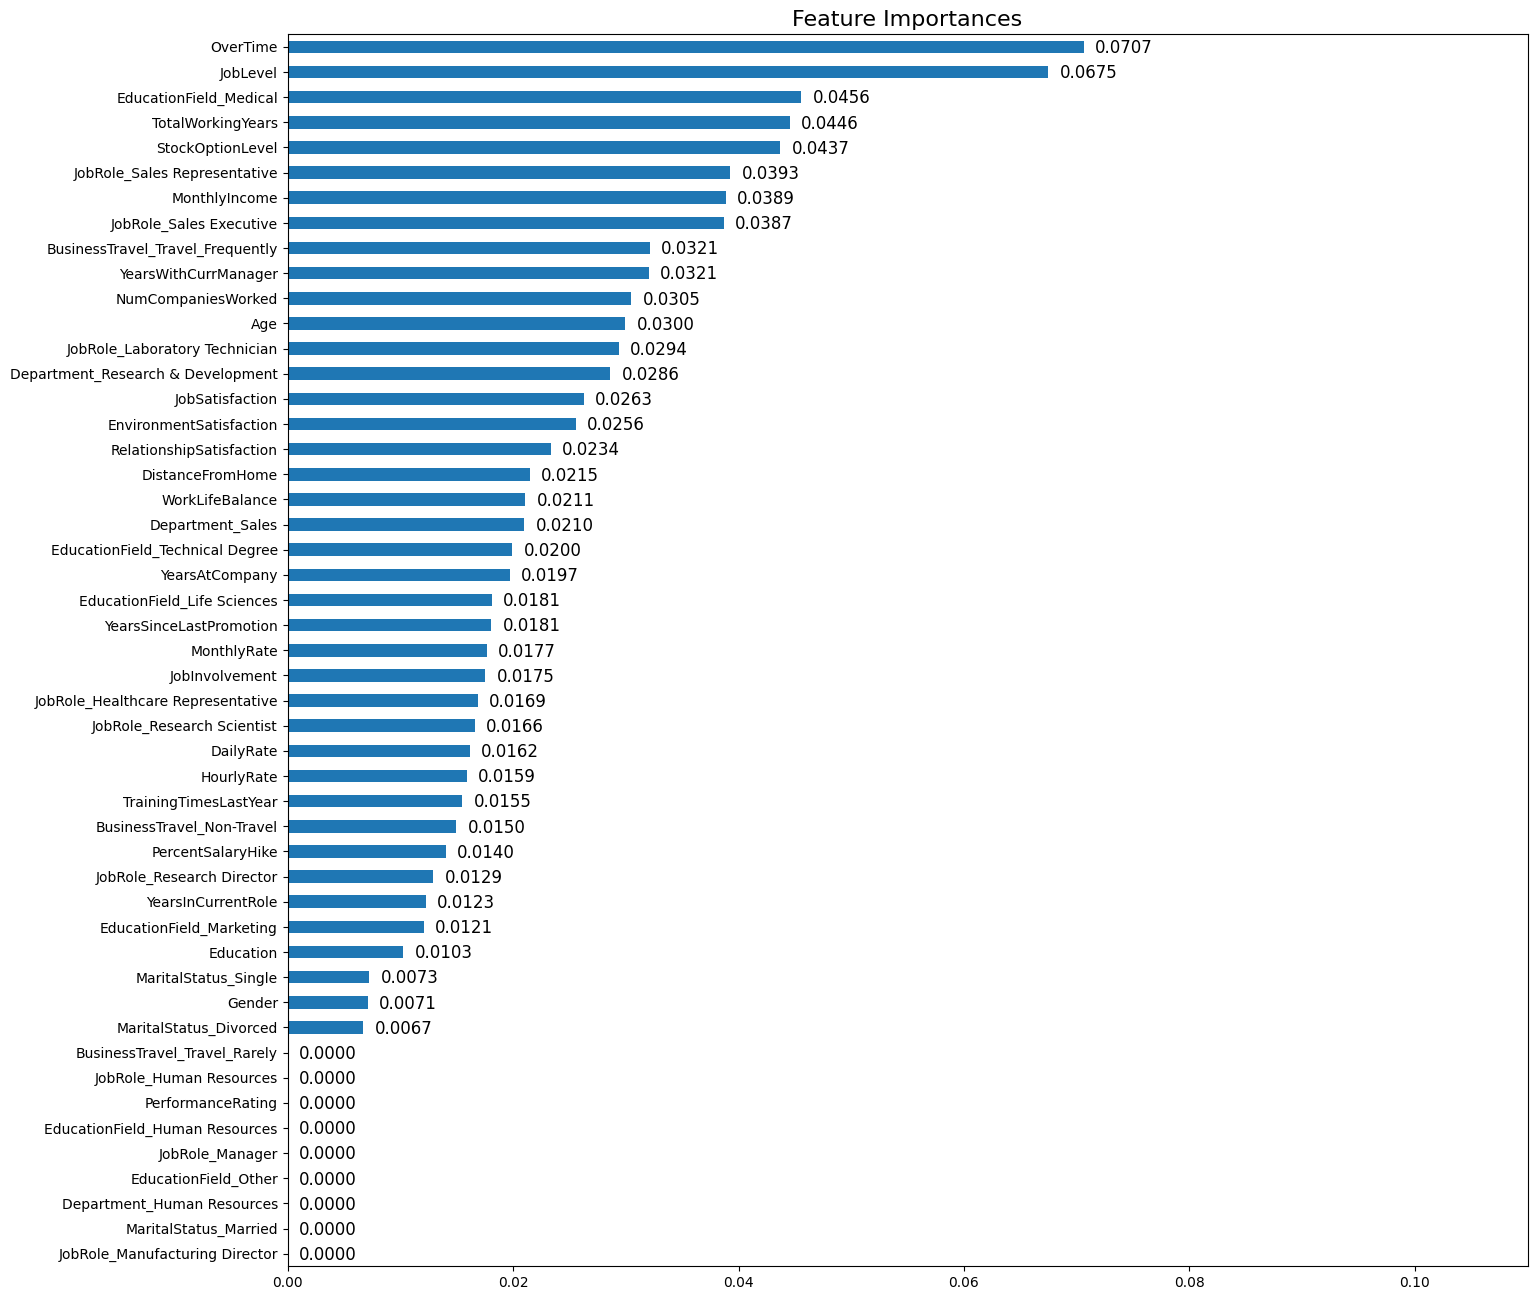

In [66]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.11)
feat_importances = pd.Series(xgb_clf.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)

# plt.savefig("xgb_f.png", bbox_inches="tight")
plt.show()

In [67]:
# make predictions
y_pred = xgb_clf.predict(X_test)

In [68]:
# calculate accuracy score
xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of XGBoost Classifier on test set: {:.2f}%'.format(xgb_accuracy*100))

Accuracy of XGBoost Classifier on test set: 88.32%


In [69]:
# Classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       309
           1       0.83      0.34      0.48        59

    accuracy                           0.88       368
   macro avg       0.86      0.66      0.71       368
weighted avg       0.88      0.88      0.86       368



In [82]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on test set: {}".format(xgb_roc_auc))

AUC on test set: 0.8171246777466952


[[305   4]
 [ 39  20]]


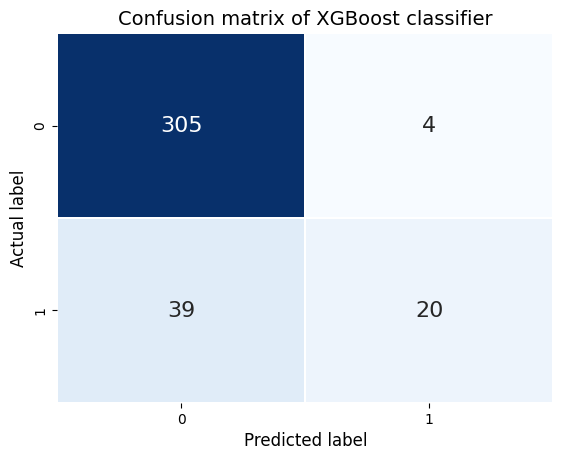

In [70]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of XGBoost classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

## **Random Forest Classifier**

In [72]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
modelCV = RandomForestClassifier(n_estimators=100, random_state=0)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))

[0.77798233 0.80460526 0.75138889 0.87077295 0.78925121 0.81562302
 0.83777778 0.87809917 0.62067819 0.86780519] 

Average AUC score = 0.8014; standard deviation = 0.0725


In [73]:
%%time
rf_classifier = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [150, 200, 250],
              "min_samples_split":[2,4,6],
              "min_samples_leaf": [1, 2],
#               "max_depth": [5, 10, 15, 20, 25],
              "class_weight": ["balanced", None]}

grid_obj = GridSearchCV(rf_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print("="*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print("best score:", grid_obj.best_score_)
print("="*20)

best estimator: RandomForestClassifier(min_samples_split=4, n_estimators=150, random_state=0)
best params: {'class_weight': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
best score: 0.808213477069182
CPU times: user 3min 39s, sys: 694 ms, total: 3min 39s
Wall time: 3min 41s


In [74]:
# get feature importances
importances = grid_obj.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.081481
1,Age,0.059403
2,OverTime,0.058700
3,DailyRate,0.054744
4,MonthlyRate,0.048324
5,TotalWorkingYears,0.046841
6,DistanceFromHome,0.044263
7,HourlyRate,0.041748
8,YearsAtCompany,0.040452
9,NumCompaniesWorked,0.033069


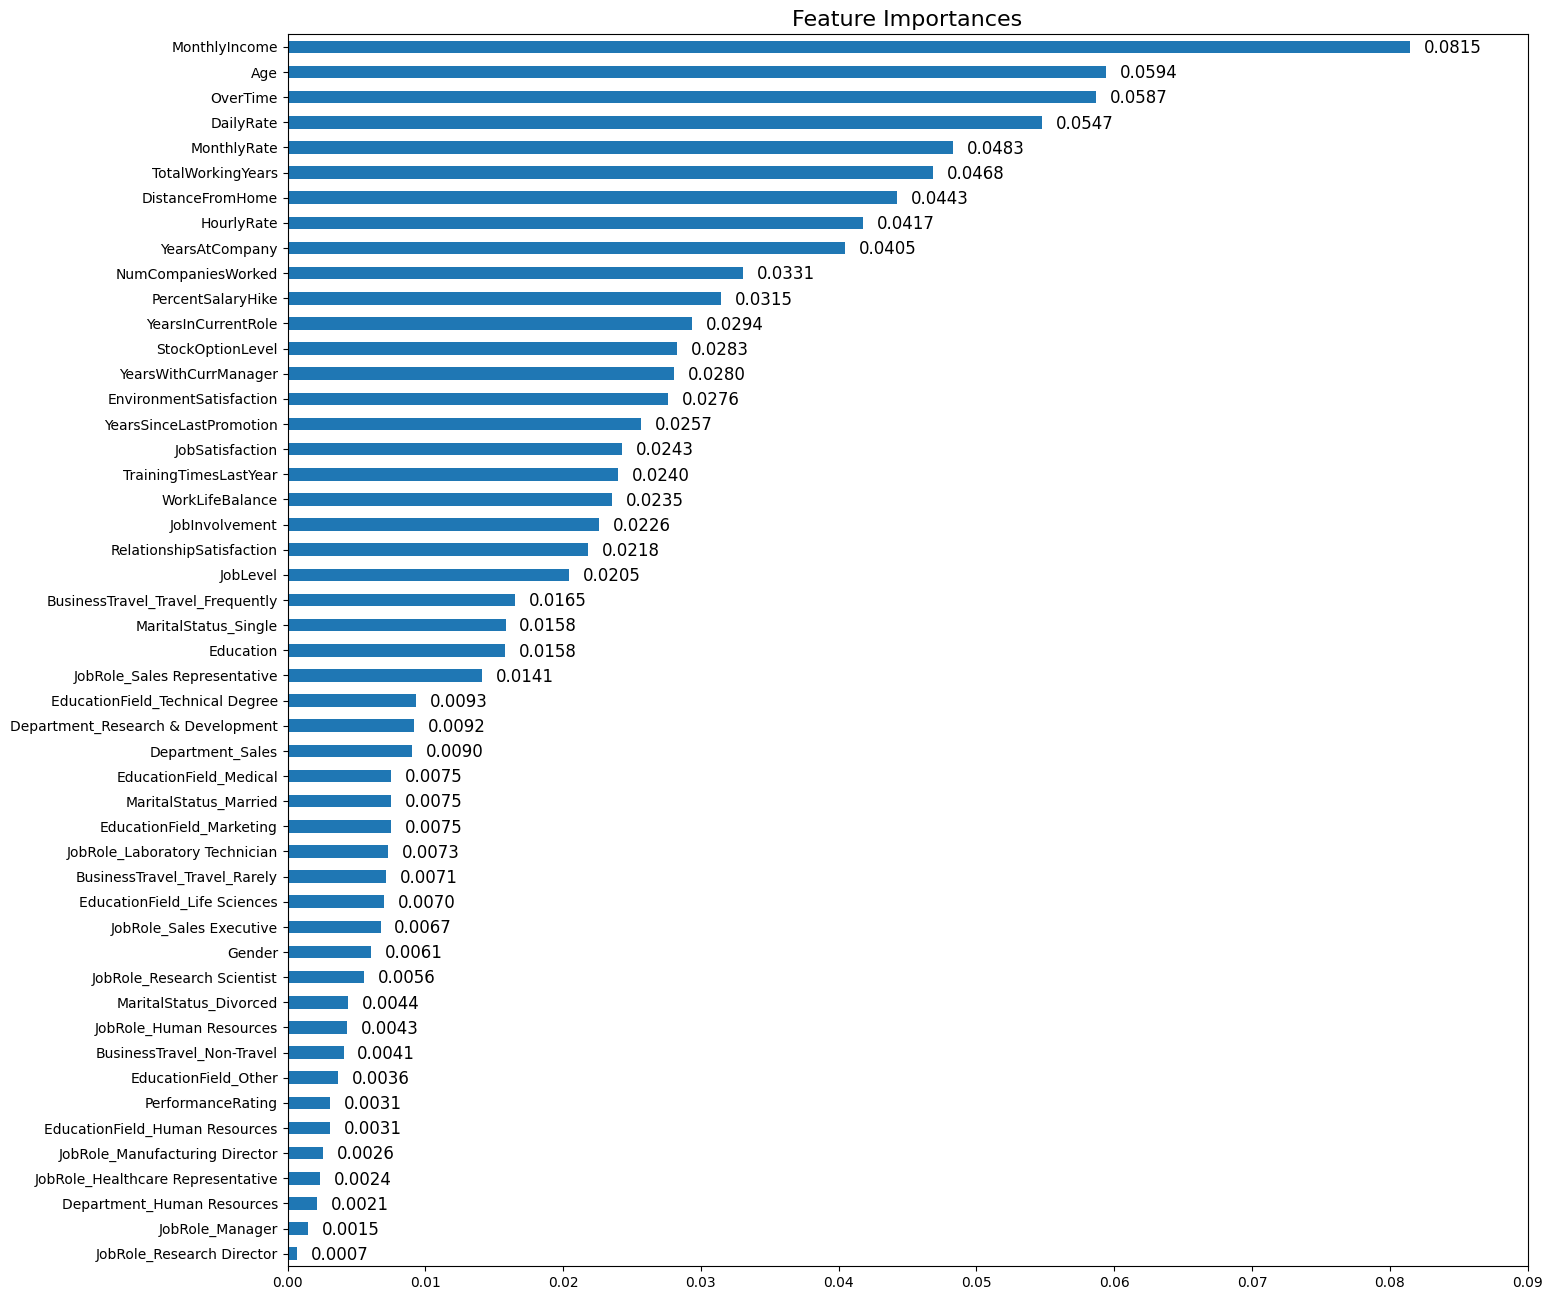

In [75]:
# plot feature importances
plt.figure(figsize=(16,16))
plt.title("Feature Importances", fontsize=16)
plt.xlim(0,0.09)
feat_importances = pd.Series(grid_obj.best_estimator_.feature_importances_, index=X_train.columns)
g1 = feat_importances.sort_values().plot(kind="barh", color="#1f77b4")
for i in g1.patches:
    # get_width pulls left or right; get_y pushes up or down
    g1.text(i.get_width()+.001, i.get_y()+.0, "{:1.4f}".format(i.get_width()), fontsize=12)

# plt.savefig("rf_f.png", bbox_inches="tight")
plt.show()

In [76]:
# make predictions
y_pred = grid_obj.predict(X_test)

In [77]:
# calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier on Test set: {:.2f}%'.format(rf_accuracy*100))

Accuracy of Random Forest Classifier on Test set: 85.05%


In [78]:
# Classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       0.83      0.08      0.15        59

    accuracy                           0.85       368
   macro avg       0.84      0.54      0.54       368
weighted avg       0.85      0.85      0.80       368



In [79]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = grid_obj.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(rf_roc_auc))

AUC on Test set: 0.8053864297076408


[[308   1]
 [ 54   5]]


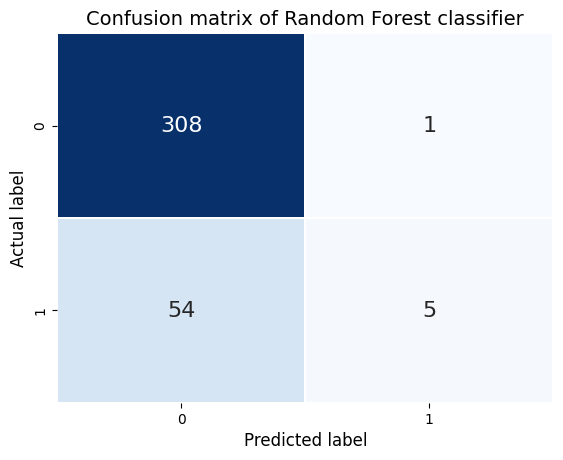

In [80]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of Random Forest classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("rf_cm.png", bbox_inches="tight")
plt.show()

# **ROC Curves**

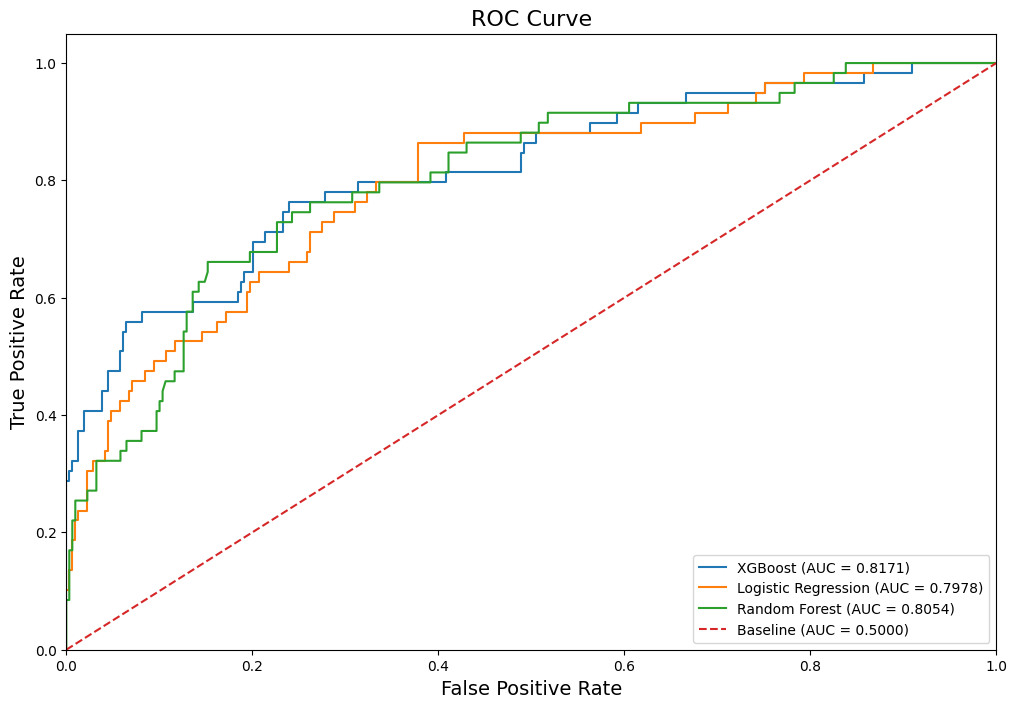

In [83]:
# create ROC curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_gs.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_obj.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label="XGBoost (AUC = {:1.4f})".format(xgb_roc_auc))
# plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:1.4f})".format(logit_roc_auc))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
# plt.savefig("roc.png", bbox_inches="tight")
plt.show()

As shown above, the fine-tuned XGBoost model showed a higher AUC score compared to Logistic Regression and Random Forest Classifier.

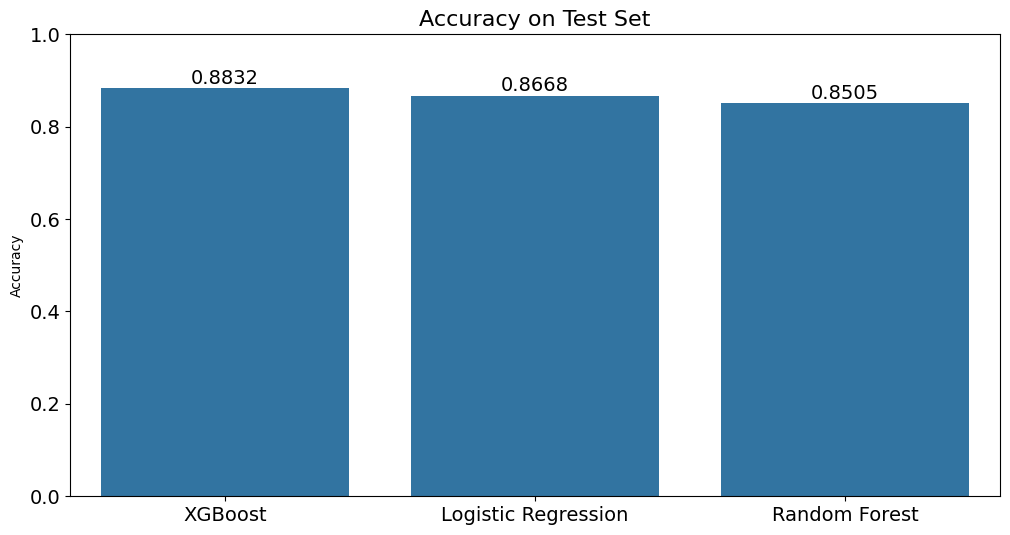

In [84]:
# combine all models' results into one dataframe
data = {"Model": ["XGBoost", "Logistic Regression", "Random Forest"],
        "Accuracy": [xgb_accuracy, logit_accuracy, rf_accuracy]}

results = pd.DataFrame(data=data)
results


plt.figure(figsize=(12, 6))

plt.title("Accuracy on Test Set", fontsize=16)
g1 = sns.barplot(x="Model", y="Accuracy", data=results)
plt.ylim(0, 1)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.4f}".format(height), ha="center", fontsize=14)

# plt.savefig("acc_results.png", bbox_inches="tight")
plt.show()